Bank Marketing dataset 

--> 20 attributes and 1 target variable

--> Age,job,marital status,education, housing loan etc to identify if the customer subscribed to Term deposit 

In [4]:
#importing the needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# function to split the data
from sklearn.model_selection import train_test_split

# metrics for measuring performance
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


Importing the data from csv file

In [5]:
dset = pd.read_csv("D://bank-additional//bank-additional//bank-additional-full.csv",header=0,sep=';')
dset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
dset.shape

(41188, 21)

In [7]:
dset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Exploring categorical columns

In [9]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week','poutcome','y']

In [10]:
#Finding unique values for each categorical column
for cols in cat_columns:
    print(cols) 
    print(dset[cols].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


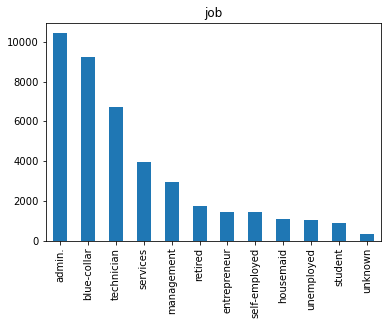

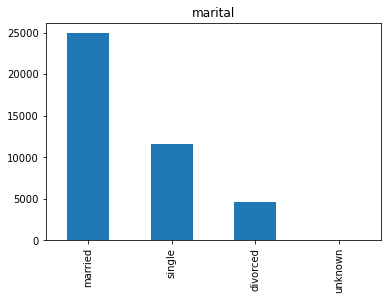

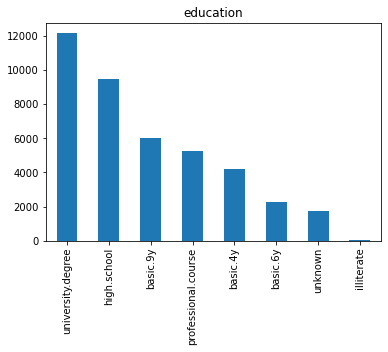

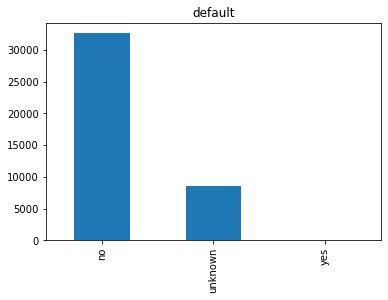

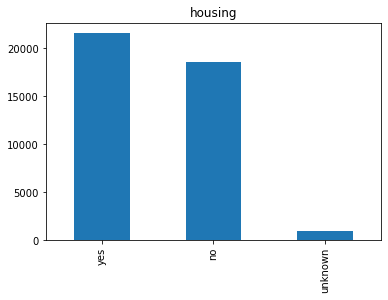

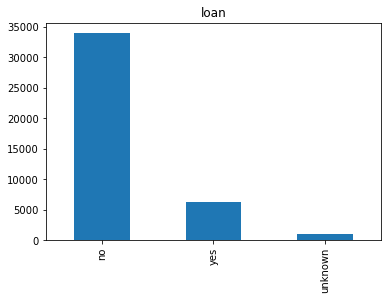

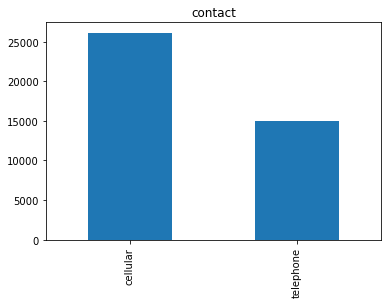

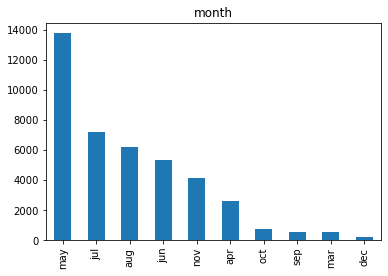

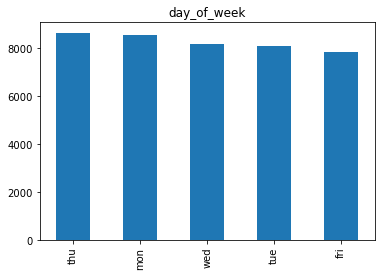

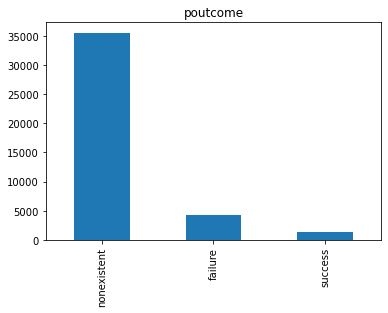

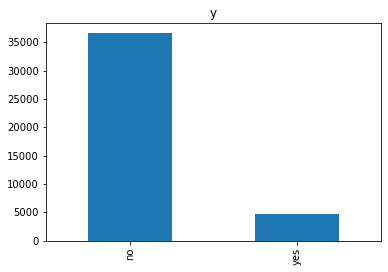

In [11]:
#count plots for each categorical variable to see the distribution

for cols in cat_columns:
    value_count = dset[cols].value_counts()
    plt.title(cols)
    plt.show(value_count.plot.bar())

Observation - For the target variable, there is imbalance in terms of number of positive and negative subscriptions of term deposit. Most of the cases are such that term deposit is not subscribed.

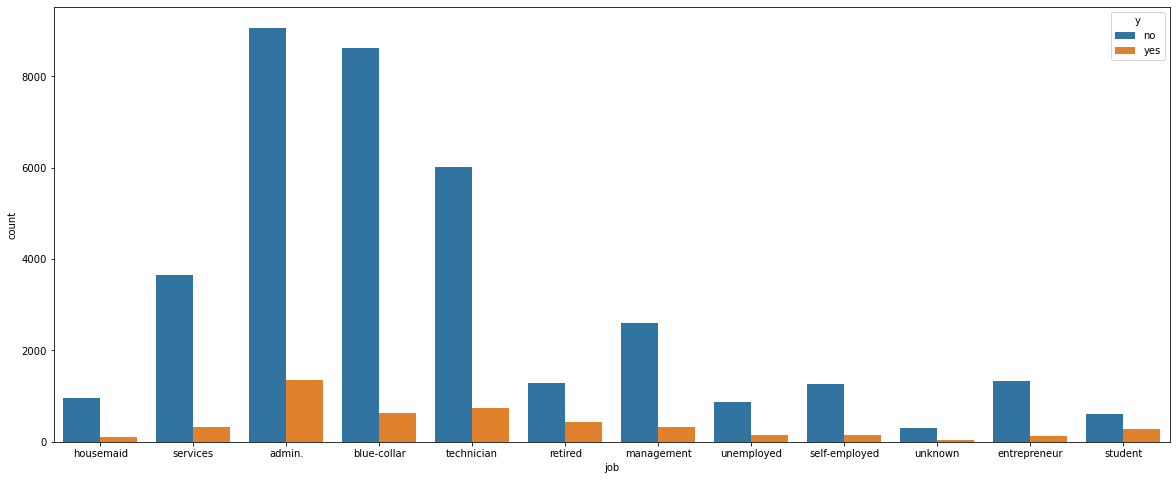

In [12]:
#now we can see how the categorical columns are affecting target label 'y'
#countplot for each categorical variable against the target label is drawn to see if we can determine the effect of
#each variable
# First feature is job
plt.figure(figsize = (20,8))
sns.countplot(x='job',hue='y',data=dset);

Observation - People with jobs as admin. have the highest number of denied subscriptions

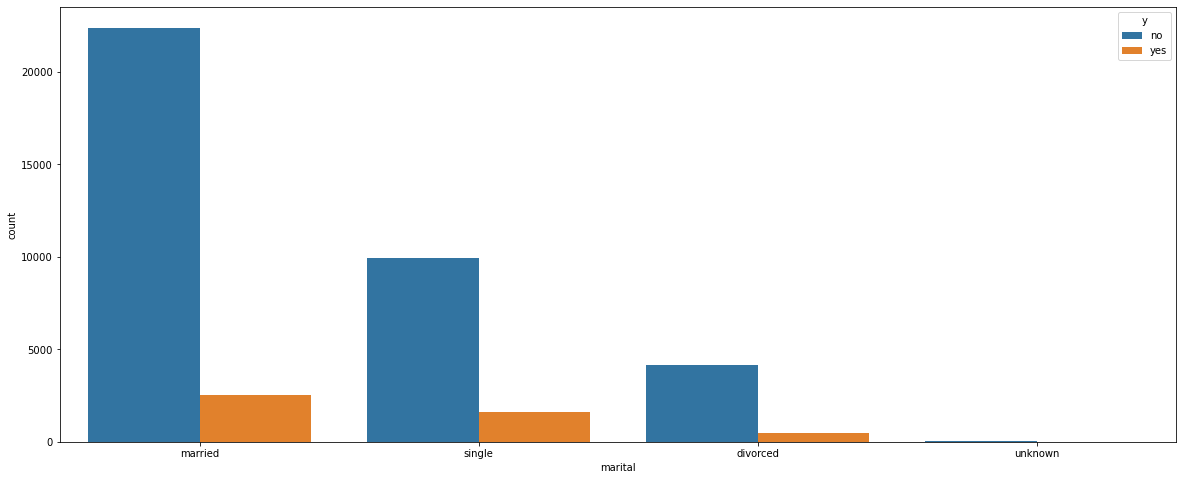

In [13]:
#Second is marital status
plt.figure(figsize = (20,8))
sns.countplot(x='marital',hue='y',data=dset);

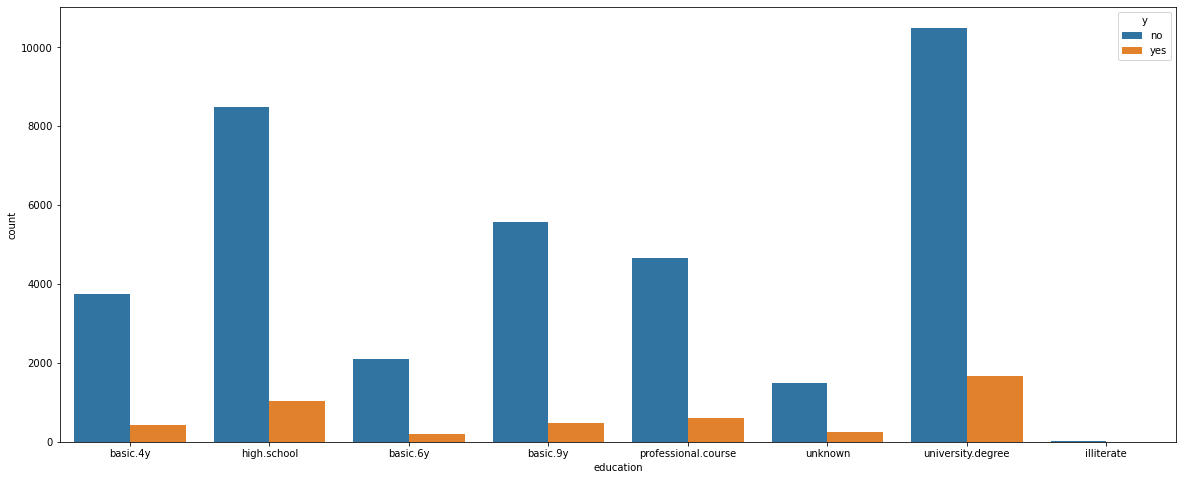

In [14]:
# Third is education
plt.figure(figsize = (20,8))
sns.countplot(x='education',hue='y',data=dset);

Observation - People with university degree have the highest number of both denied and approved subscriptions. Education has an effect on the target variable

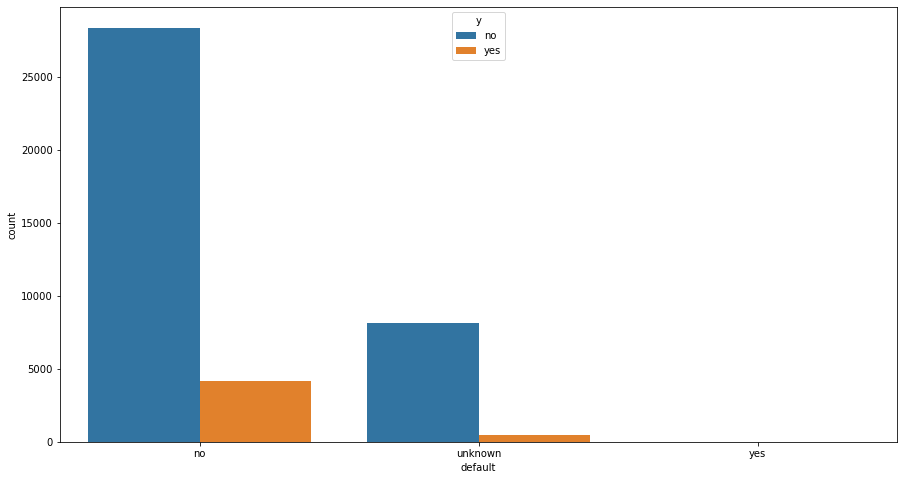

In [15]:
# 4th is default
plt.figure(figsize = (15,8))
sns.countplot(x='default',hue='y',data=dset);

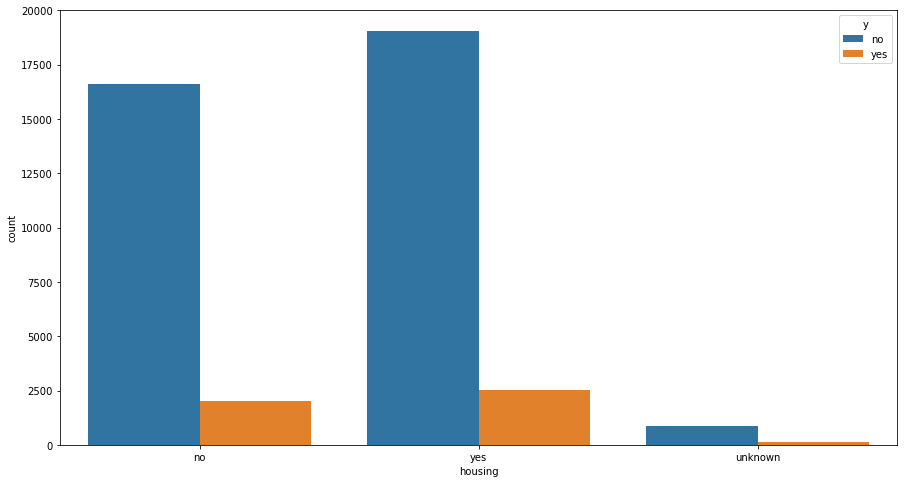

In [16]:
# 5th is housing loan 
plt.figure(figsize = (15,8))
sns.countplot(x='housing',hue='y',data=dset);

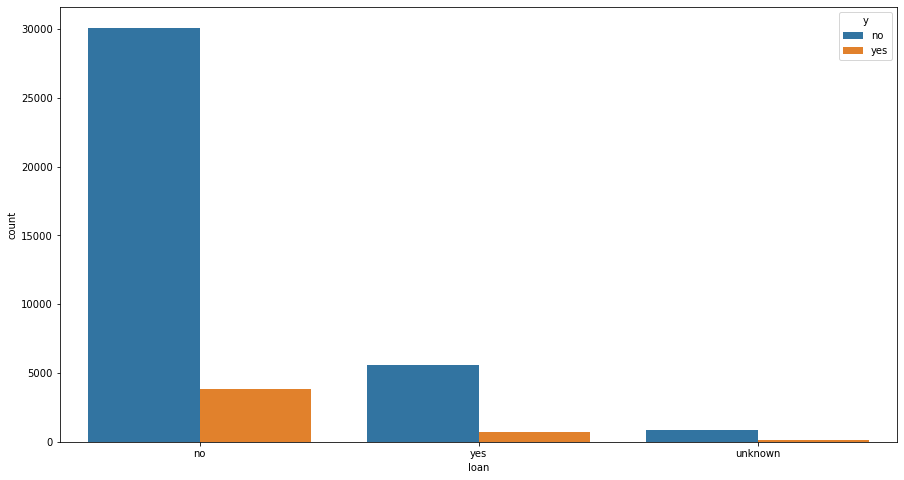

In [17]:
# 6th is personal loan 
plt.figure(figsize = (15,8))
sns.countplot(x='loan',hue='y',data=dset);

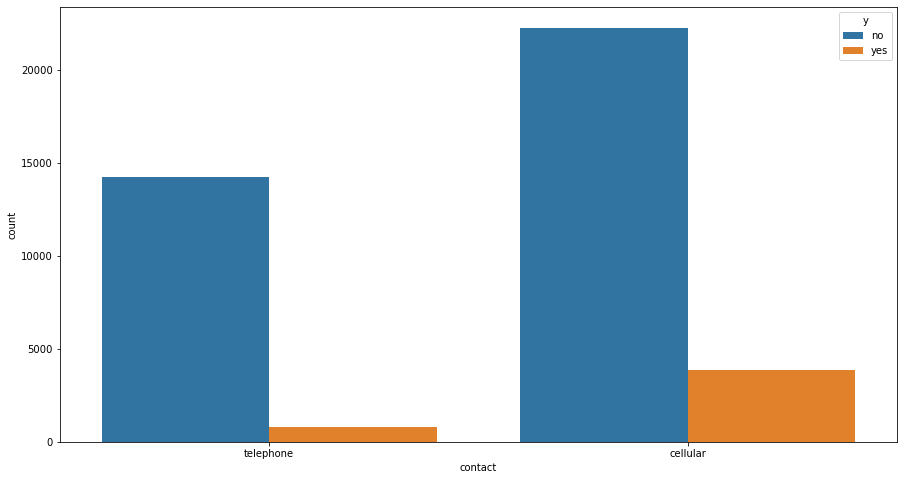

In [18]:
# 7th is contact 
plt.figure(figsize = (15,8))
sns.countplot(x='contact',hue='y',data=dset);

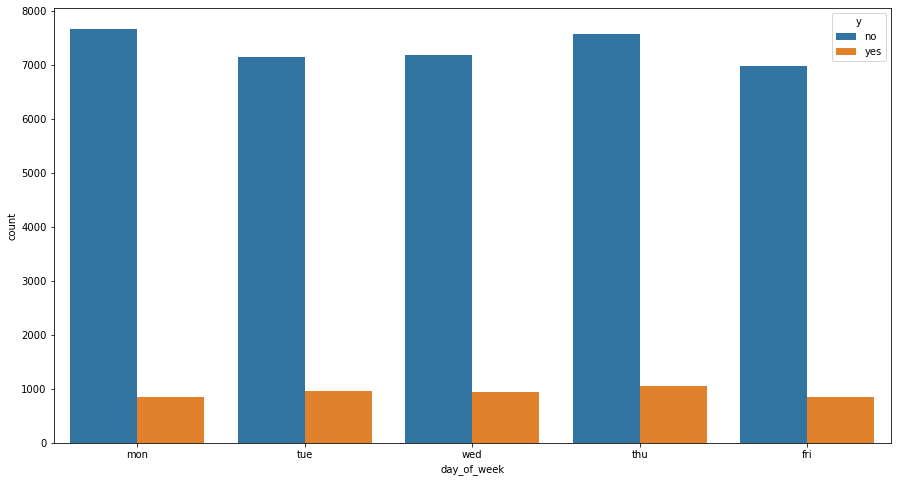

In [19]:
# 8th is day_of_week 
plt.figure(figsize = (15,8))
sns.countplot(x='day_of_week',hue='y',data=dset);

Observation - Distribution is same for all days of the week so we can drop this column from our final model columns

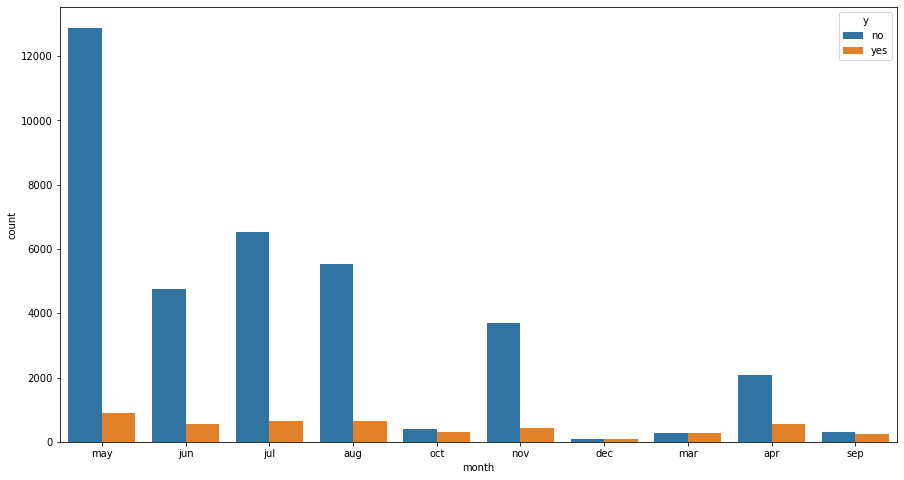

In [20]:
# 9th is month 
plt.figure(figsize = (15,8))
sns.countplot(x='month',hue='y',data=dset);

Observation - May has the highest number of denied subscriptions but this variable does have an impact on our target variable

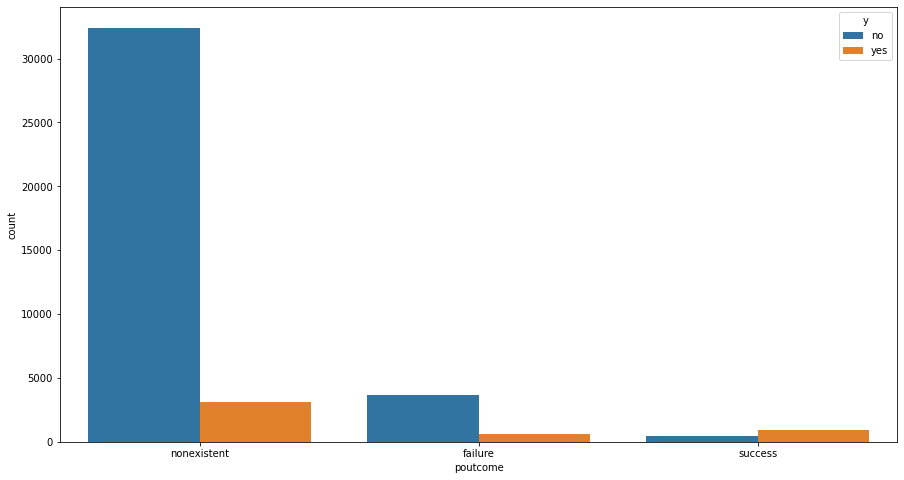

In [21]:
# 10th is poutcome
plt.figure(figsize = (15,8))
sns.countplot(x='poutcome',hue='y',data=dset);

In [22]:
dset = dset.drop('day_of_week',axis=1)
dset.shape

(41188, 20)

## Exploring the numerical columns


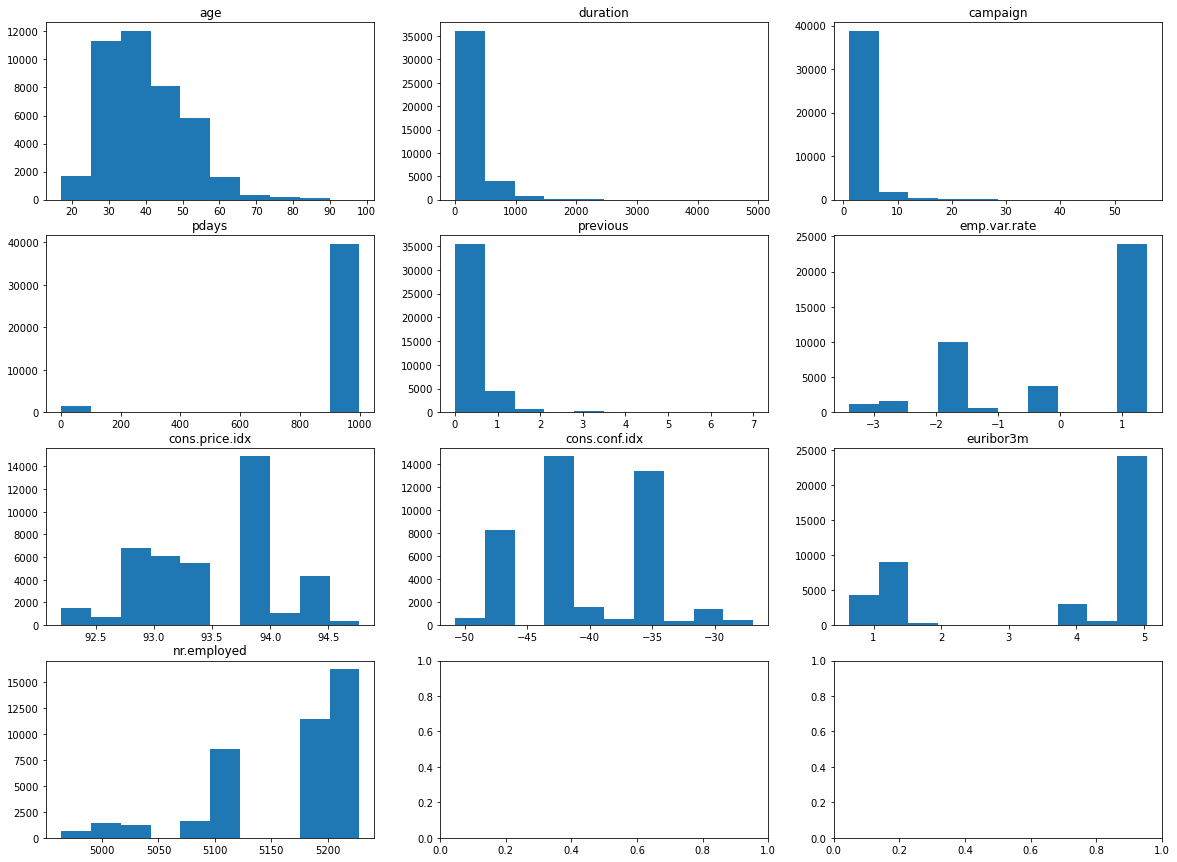

In [23]:
#plotting histogram to see the values in numerical columns
num_columns = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(dset[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

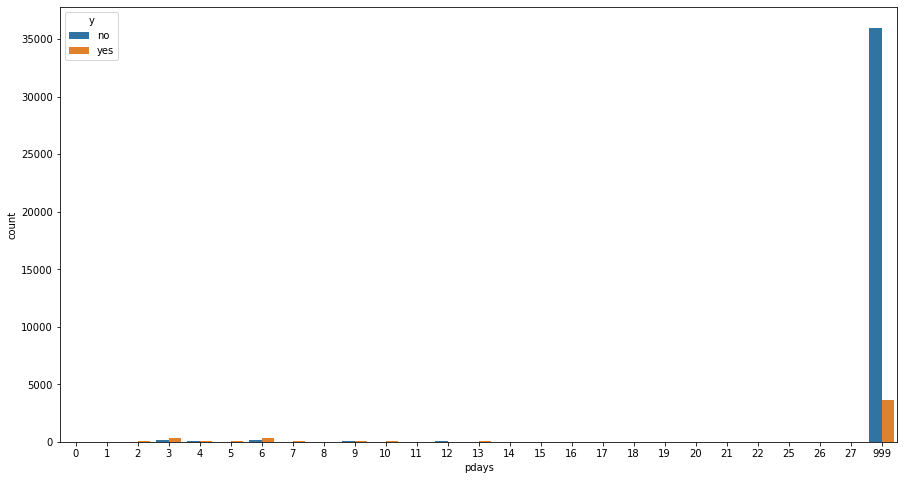

In [24]:
#variation of output variable with pdays
plt.figure(figsize = (15,8))
sns.countplot(x='pdays',hue='y',data=dset);

Observation - Most of the cases where target variable is no - have pdays as 999 which means that they were not contacted
in the previous campain 

## Prepping the data to be fed to model - 

In [25]:
# replacing the categorical data to numeric data

# job
# ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
#  'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
#  'student']

dset_formatted = dset.copy()
replace_map_job = {'job':{"housemaid":1,'services':2,'admin.':3 ,'blue-collar':4, 'technician':5, 'retired':6,
 'management':7, 'unemployed':8 ,'self-employed':9, 'unknown':10, 'entrepreneur':11,'student':12}}

dset_formatted.replace(replace_map_job,inplace=True)

# marital
# ['married' 'single' 'divorced' 'unknown']
replace_map_marital = {'marital':{'married':1, 'single':2, 'divorced':3, 'unknown':4}}
dset_formatted.replace(replace_map_marital,inplace=True)

# education
# ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
#  'unknown' 'university.degree' 'illiterate']

replace_map_education = {'education':{'basic.4y':1,'high.school':2, 'basic.6y':3, 'basic.9y':4, 'professional.course':5,
 'unknown':6, 'university.degree':7, 'illiterate':8}}
dset_formatted.replace(replace_map_education,inplace=True)

# default
# ['no' 'unknown' 'yes']
replace_map_default = {'default':{'no':1,'unknown':2,'yes':3}}
dset_formatted.replace(replace_map_default,inplace=True)

# housing
# ['no' 'yes' 'unknown']
replace_map_housing = {'housing':{'no':1,'unknown':2,'yes':3}}
dset_formatted.replace(replace_map_housing,inplace=True)

# loan
# ['no' 'yes' 'unknown']
replace_map_loan = {'loan':{'no':1,'unknown':2,'yes':3}}
dset_formatted.replace(replace_map_loan,inplace=True)

# contact
# ['telephone' 'cellular']
replace_map_contact = {'contact':{'telephone':1,'cellular':2}}
dset_formatted.replace(replace_map_contact,inplace=True)

# month
# ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
replace_map_month = {'month':{'mar':1,'apr':2,'may':3,'jun':4,'jul':5,'aug':6,'sep':7,'oct':8,'nov':9,'dec':10}}
dset_formatted.replace(replace_map_month,inplace=True)

# poutcome
# ['nonexistent' 'failure' 'success']
replace_map_poutcome = {'poutcome':{'nonexistent':1,'failure':2,'success':3}}
dset_formatted.replace(replace_map_poutcome,inplace=True)

# y
# ['no' 'yes']
replace_map_target = {'y':{'no':0,'yes':1}}
dset_formatted.replace(replace_map_target,inplace=True)

dset_formatted.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,1,1,1,1,3,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,1,2,2,1,1,1,3,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,1,2,1,3,1,1,3,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,1,3,1,1,1,1,3,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,1,2,1,1,3,1,3,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [26]:
dset_formatted.tail()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,6,1,5,1,3,1,2,9,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,4,1,5,1,1,1,2,9,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,6,1,7,1,3,1,2,9,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,5,1,5,1,1,1,2,9,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,6,1,5,1,3,1,2,9,239,3,999,1,2,-1.1,94.767,-50.8,1.028,4963.6,0


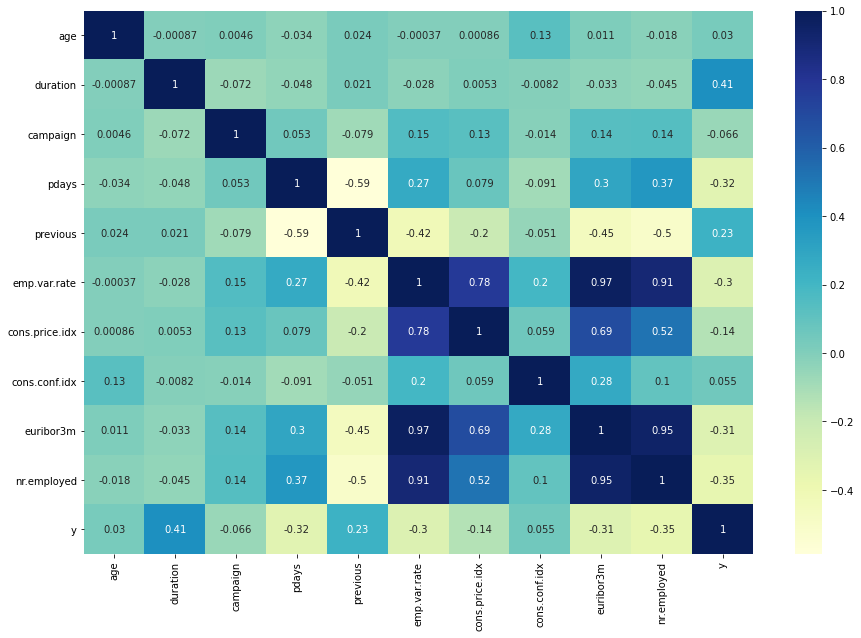

In [27]:
#finding the correlation matrix for numerical columns against target variable
num_columns = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']
dset_numerical = dset_formatted[num_columns] 
plt.figure(figsize = (15,10))
c1 = dset_numerical.corr()
ax = sns.heatmap(c1,cmap="YlGnBu",annot=True)

Analysis from above correlation matrix:

a) euribor3m, emp.var.rate and nr.employed are highly correlated above 90%

b) Order of the correlation with target variable(decreasing order)
    i) Duration
    ii) Previous contact(previous)
      
c) Negative correlation is highest in number of employees

# Splitting the data to train and test in 70-30 ratio

In [28]:
final_columns = ['age', 'job', 'marital', 'education', 'default', 'housing',
                 'loan','contact', 'month', 'duration', 'campaign',
                 'pdays','previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
                   'cons.conf.idx']

X = dset_formatted[final_columns]
y = dset_formatted['y']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=25)

#check the size of training and test dataset
print('Size of training dataset is:',X_train.shape)
print('Size of test dataset is:',X_test.shape)


Size of training dataset is: (28831, 17)
Size of test dataset is: (12357, 17)


In [147]:
#Create a common procedure for displaying the classification report and confusion matrix

def model_matrices(predictions):
    
    print("\n Classification report:")
    print(classification_report(y_test, predictions))
    
    print('\n Confusion matrix:')
    Confusion_mat = confusion_matrix(y_test, predictions)
    print(Confusion_mat)
    
   
    #plotting the confusion matrix in terms of precentages
    ax = sns.heatmap(Confusion_mat/np.sum(Confusion_mat), annot=True,fmt='.2%',linewidths=.5,cmap='Blues')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['0(no)','1(yes)'])
    ax.yaxis.set_ticklabels(['0(no)','1(yes)'])
    

Classification report values :

Precision:- Accuracy of positive predictions.

Recall:- Fraction of positives that were correctly identified.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)  F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0

Support is the number of actual occurrences of the class in the specified dataset

In [95]:
#Create a common procedure for plotting ROC curve and displaying AUC

def draw_roc(model_name,classifier,predictions):
    probs = classifier.predict_proba(X_test) #gives the probability of the target in array form
    preds = probs[:,1]
    #fpr is false positive rate
    fpr,tpr,threshold = metrics.roc_curve(y_test,preds)
    roc_auc = metrics.auc(fpr, tpr)

    print('Auc score for '+model_name+ ' is:', roc_auc)

    plt.subplots(1, figsize=(8,8))
    plt.title('Receiver Operating Characteristic' +model_name)
    plt.plot(fpr, tpr,label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right', prop={'size': 16})
    plt.show()
    

## Decision tree algorithm
     Create the model
     Predict 
     Measure performance

Accuracy with DT is  88.35477866796147 %
Precision with DT is  48.89992902767921 %
Recall score with DT is  0.4893465909090909
f1 score with DT is  0.4891728789492368

 Classification report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10949
           1       0.49      0.49      0.49      1408

    accuracy                           0.88     12357
   macro avg       0.71      0.71      0.71     12357
weighted avg       0.88      0.88      0.88     12357


 Confusion matrix:
[[10229   720]
 [  719   689]]


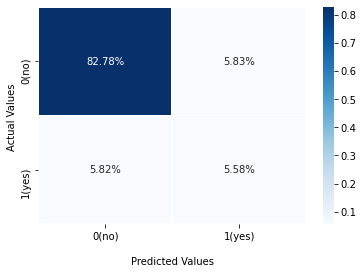

In [148]:

model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
predictions1 = model1.predict(X_test)


accdt = metrics.accuracy_score(y_test,predictions1)
print ("Accuracy with DT is ", accdt*100,"%")

precdt = metrics.precision_score(y_test,predictions1)
print ("Precision with DT is ",precdt*100,'%')

print ("Recall score with DT is ",metrics.recall_score(y_test,predictions1))

print ("f1 score with DT is ",metrics.f1_score(y_test,predictions1))

model_matrices(predictions1)


Observation - Around 5-6% of No were identified as Yes which means around 6% of people who did not actually subscribe for the term deposit were identified as yes

Auc score for Decision Tree is: 0.7186068388354271


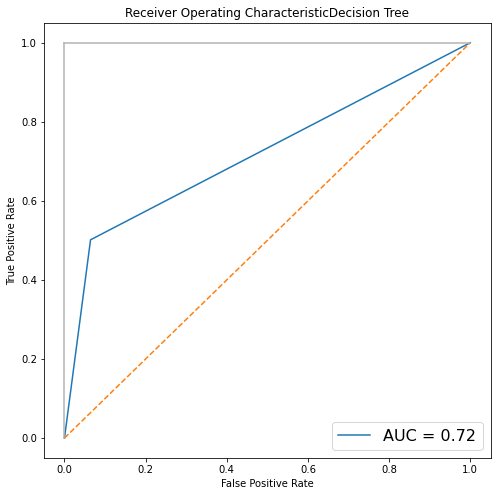

In [82]:
#Roc curve(Reciever Operating Characterstic curve) and AUC 
draw_roc('Decision Tree',model1,predictions1)


In [83]:
#There seems to be the problem of overfitting because when we print the predicted proabbility the array returns all as 0 or 1


## Random Forest algorithm
     Create the model
     Predict 
     Measure performance

In [84]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
predictions2 = model2.predict(X_test)

Accuracy with RF is  0.90928218823339

 Classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10949
           1       0.63      0.49      0.55      1408

    accuracy                           0.91     12357
   macro avg       0.78      0.73      0.75     12357
weighted avg       0.90      0.91      0.90     12357


 Confusion matrix:
[[10543   406]
 [  715   693]]


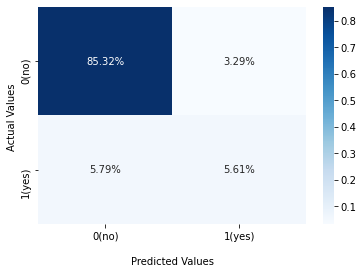

In [114]:
accrf = metrics.accuracy_score(y_test,predictions2)
print ("Accuracy with RF is ",accrf)

precrf = metrics.precision_score(y_test,predictions2)

model_matrices(predictions2)

Observation - Around only 3 percent of no's were identified as yes, which is better as compared to Decision tree 

Auc score for Random Forest is: 0.934171843474705


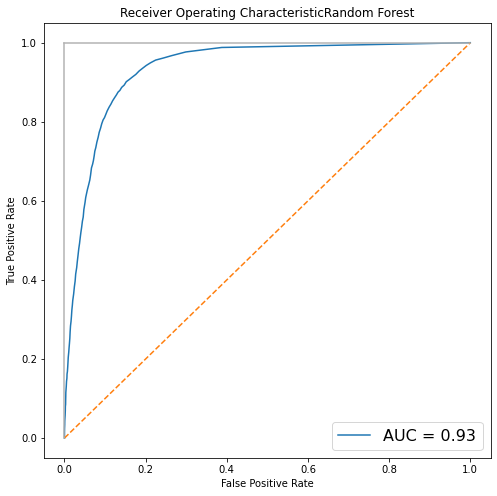

In [86]:
draw_roc('Random Forest',model2,predictions2)

In [49]:
#Feature importance from Random forest classifier
feature_imp = pd.Series(model2.feature_importances_,index=final_columns).sort_values(ascending=False)
feature_imp

duration          0.338909
age               0.119152
cons.conf.idx     0.060066
job               0.059811
pdays             0.058071
education         0.050384
campaign          0.050151
emp.var.rate      0.046127
cons.price.idx    0.044940
poutcome          0.034102
month             0.030667
marital           0.027256
housing           0.023230
previous          0.018073
loan              0.016541
contact           0.012376
default           0.010147
dtype: float64

## Logistic regression 
     Create the model
     Predict 
     Measure performance

In [50]:
# Scale the data for Logistic regression model
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_lg = sc_X.fit_transform(X_train)
X_test_lg = sc_X.transform(X_test)

In [51]:
model3 = LogisticRegression()
# fit the model with data
model3.fit(X_train_lg,y_train)
predictions3 = model3.predict(X_test_lg)

Accuracy with LR is  0.9081492271586955

 Classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10949
           1       0.66      0.40      0.50      1408

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357


 Confusion matrix:
[[10653   296]
 [  839   569]]


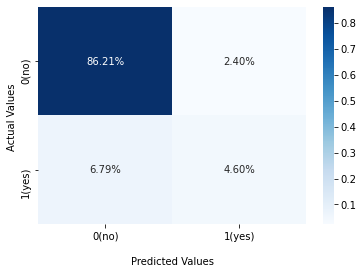

In [115]:
acclr = metrics.accuracy_score(y_test,predictions3)
print ("Accuracy with LR is ",acclr)

preclr = metrics.precision_score(y_test,predictions3)

model_matrices(predictions3)

Observation - Only 2.5% of no's were identified as yes, this is still an improvement as compared to Random forest and 
decision tree

Auc score for Logistic Regression is: 0.8171444997571384


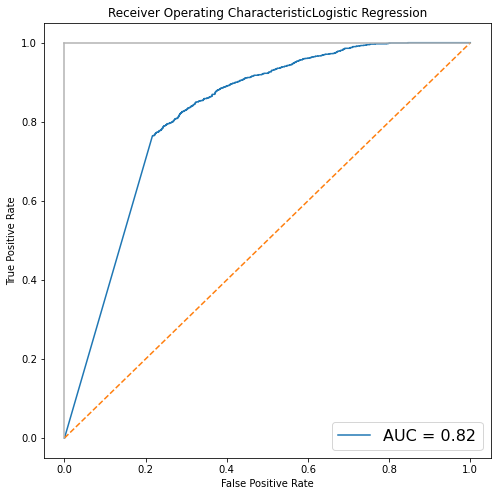

In [87]:
draw_roc('Logistic Regression',model3,predictions3)


## K-Nearest neighbour
     Create the model
     Predict 
     Measure performance

In [54]:
model4 = KNeighborsClassifier()
model4.fit(X_train, y_train)
predictions4 = model4.predict(X_test)

Accuracy with KNN is  0.8992473901432386

 Classification report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10949
           1       0.59      0.39      0.47      1408

    accuracy                           0.90     12357
   macro avg       0.76      0.68      0.71     12357
weighted avg       0.89      0.90      0.89     12357


 Confusion matrix:
[[10564   385]
 [  860   548]]


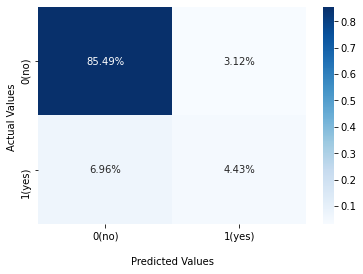

In [116]:
accknn = metrics.accuracy_score(y_test,predictions4)
print ("Accuracy with KNN is ",accknn)

precknn =  metrics.precision_score(y_test,predictions4)

model_matrices(predictions4)

Auc score for KNN is: 0.8406953870320245


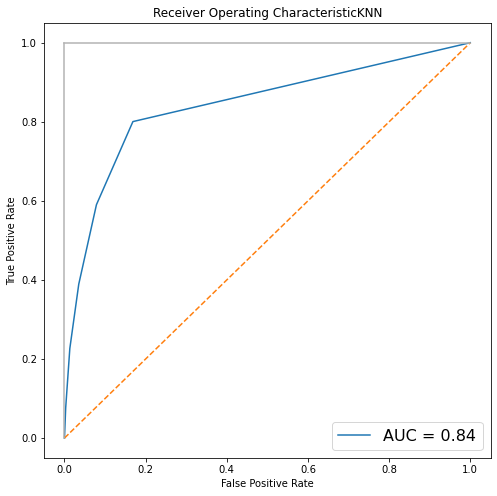

In [88]:
draw_roc('KNN',model4,predictions4)

## Naive - bayes algorithm
     Create the model
     Predict 
     Measure performance

In [57]:
model5 = GaussianNB()
model5.fit(X_train, y_train)
predictions5 = model5.predict(X_test)


Accuracy with Naive Bayes is  0.8471311807072914

 Classification report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10949
           1       0.37      0.50      0.43      1408

    accuracy                           0.85     12357
   macro avg       0.65      0.69      0.67     12357
weighted avg       0.87      0.85      0.86     12357


 Confusion matrix:
[[9769 1180]
 [ 709  699]]


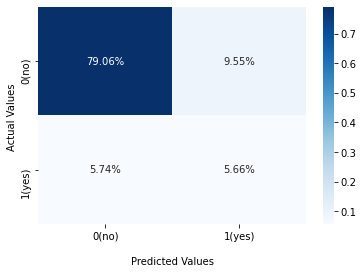

In [117]:
accnb = metrics.accuracy_score(y_test,predictions5)
print ("Accuracy with Naive Bayes is ",accnb)

precnb = metrics.precision_score(y_test,predictions5)

model_matrices(predictions5)

Observation - Around 10% of not subscribed cases were identfied as subscibed.(Much higher as compared to other models)

Auc score for Naive Bayes is: 0.8513159086238677


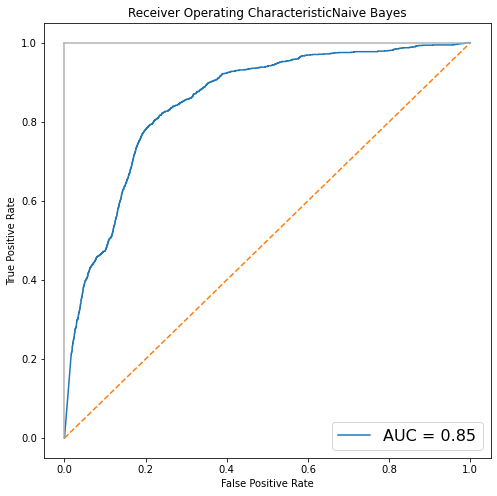

In [89]:
draw_roc('Naive Bayes',model5,predictions5)

## XGBoost algorithm
     Create the model
     Predict 
     Measure performance

In [60]:
model6 = XGBClassifier()
model6.fit(X_train, y_train)
predictions6 = model6.predict(X_test)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:08:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy with XGBoost is  0.911952739338027

 Classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10949
           1       0.65      0.50      0.57      1408

    accuracy                           0.91     12357
   macro avg       0.79      0.73      0.76     12357
weighted avg       0.90      0.91      0.91     12357


 Confusion matrix:
[[10561   388]
 [  700   708]]


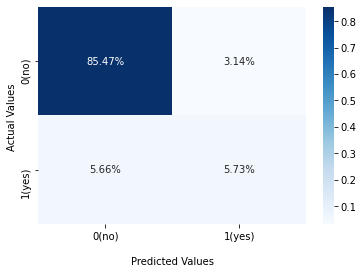

In [118]:
accxgb = metrics.accuracy_score(y_test,predictions6)
print ("Accuracy with XGBoost is ",metrics.accuracy_score(y_test,predictions6))

precxgb = metrics.precision_score(y_test,predictions6)

model_matrices(predictions6)

Auc score for XGBoost is: 0.9423656957567733


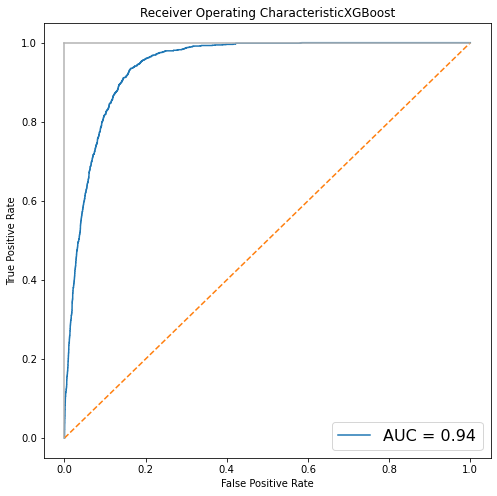

In [90]:
draw_roc('XGBoost',model6,predictions6)

Comparing the different models on the basis of accuracy and precision 

In [63]:
models = pd.DataFrame({
                'Models': ['Decision Tree Classifier','Random Forest Classifier', 'Logistic Regression',
                           'K-Nearest Neighbors', 'Naive Bayes', 'XGBoost'],
                'Accuracy':  [accdt, accrf, acclr, accknn, accnb,accxgb],
                'Precision': [precdt,precrf,preclr,precknn,precnb,precxgb]})

models.sort_values(by='Accuracy', ascending=False)

,Models,Accuracy,Precision
5,XGBoost,0.911953,0.645985
1,Random Forest Classifier,0.909444,0.631963
2,Logistic Regression,0.908149,0.657803
3,K-Nearest Neighbors,0.899247,0.587353
0,Decision Tree Classifier,0.886137,0.500365
4,Naive Bayes,0.847131,0.372006


## Tuning Hyperparameters

Tuning decision tree

Accuracy of tune decision tree is: 90.61260823824553
Precision of tuned decision tree is: 66.62198391420911

 Classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10949
           1       0.67      0.35      0.46      1408

    accuracy                           0.91     12357
   macro avg       0.79      0.67      0.71     12357
weighted avg       0.89      0.91      0.89     12357


 Confusion matrix:
[[10700   249]
 [  911   497]]


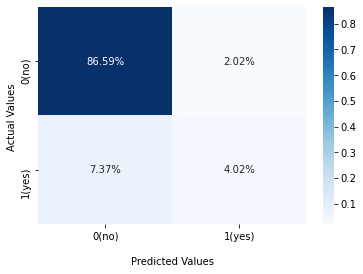

In [119]:
#Tuned on the basis of maximum depth
dt_tune1 = DecisionTreeClassifier(max_depth=4)
dt_tune1.fit(X_train, y_train)
pred_tune1 = dt_tune1.predict(X_test)

acctune1 = metrics.accuracy_score(y_test,pred_tune1)
print("Accuracy of tune decision tree is:",acctune1*100)

prectune1 = metrics.precision_score(y_test,pred_tune1)
print("Precision of tuned decision tree is:",prectune1*100)

model_matrices(pred_tune1)

Observation - 

1. Precision is increased with the tuned decision tree.
2. After tuning the number of no's which were identified as yes is much less as compared to the decision tree
classifier with default values.

But there is also an increase in wrong identification of subscribed cases as unsubscribed.Maybe it adds an overhead in later stages of analysis.

Auc score for Tuned decision tree is: 0.8752069577234117


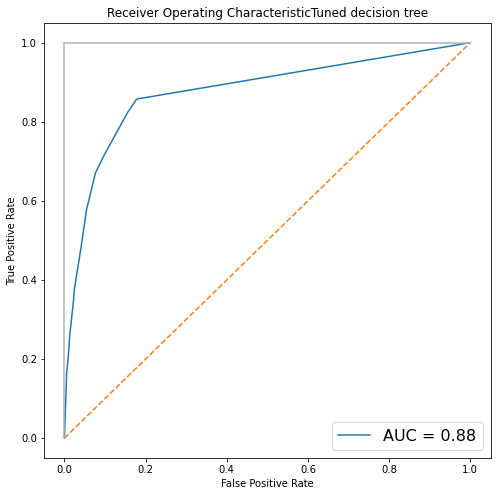

In [92]:
#Roc curve
draw_roc('Tuned decision tree',dt_tune1,pred_tune1)

Performed better than default decision tree where AUC was 0.71

Accuracy of tuned decision tree is: 90.67734887108521
Precision of tuned decision tree is: 60.72026800670016

 Classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10949
           1       0.61      0.51      0.56      1408

    accuracy                           0.91     12357
   macro avg       0.77      0.74      0.75     12357
weighted avg       0.90      0.91      0.90     12357


 Confusion matrix:
[[10480   469]
 [  683   725]]


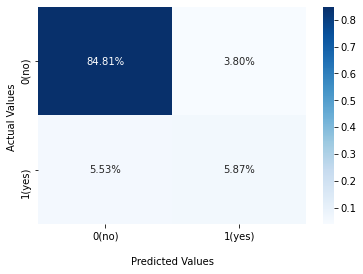

In [121]:
#Tuned on the basis of minimum splits
dt_tune2 = DecisionTreeClassifier(min_samples_split=60)
dt_tune2.fit(X_train, y_train)
pred_tune2 = dt_tune2.predict(X_test)

acctune2 = metrics.accuracy_score(y_test,pred_tune2)
print("Accuracy of tuned decision tree is:",acctune2*100)

prectune2 = metrics.precision_score(y_test,pred_tune2)
print("Precision of tuned decision tree is:",prectune2*100)

model_matrices(pred_tune2)

2. Tuning Random Forest Classifier

In [68]:
from sklearn.model_selection import GridSearchCV

params = {"n_estimators":[50,100],
          "max_depth":[4,5]}

cv = GridSearchCV(model2,params,cv=3)
cv.fit(X_train,y_train)



GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5], 'n_estimators': [50, 100]})

In [69]:
print('Best paramters are:', cv.best_params_)

Best paramters are: {'max_depth': 5, 'n_estimators': 50}


Accuracy of tuned decision tree is: 90.26462733673222
Precision of tuned decision tree is: 79.36962750716332

 Classification report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10949
           1       0.79      0.20      0.32      1408

    accuracy                           0.90     12357
   macro avg       0.85      0.60      0.63     12357
weighted avg       0.89      0.90      0.88     12357


 Confusion matrix:
[[10877    72]
 [ 1131   277]]


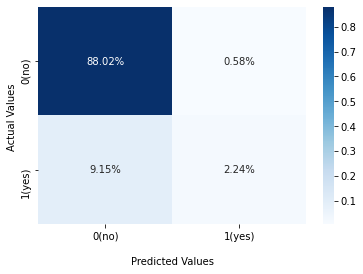

In [122]:
rfc_tuned = RandomForestClassifier(max_depth=5,n_estimators=100)
rfc_tuned.fit(X_train,y_train)
pred_rfc_tuned = rfc_tuned.predict(X_test)

rfc_tuned_acc = metrics.accuracy_score(y_test,pred_rfc_tuned)
print("Accuracy of tuned decision tree is:",rfc_tuned_acc*100)

rfc_tuned_prec = metrics.precision_score(y_test,pred_rfc_tuned)
print("Precision of tuned decision tree is:",rfc_tuned_prec*100)

model_matrices(pred_rfc_tuned)

Auc score for Tuned RF is: 0.9311737619770174


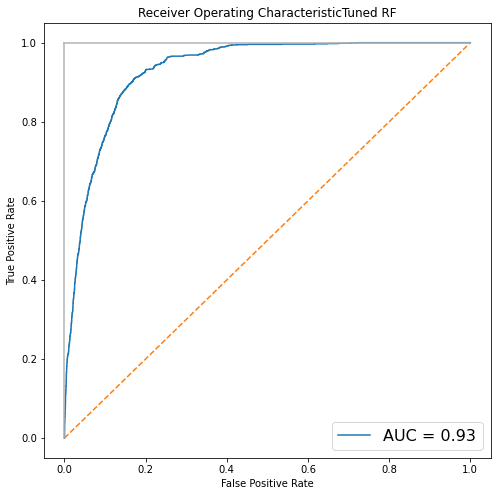

In [149]:
draw_roc('Tuned RF',rfc_tuned,pred_rfc_tuned)

Accuracy is the same as 90.1 but the precision is now increased.